<a href="https://colab.research.google.com/github/mshsu/probasets/blob/main/notebooks/ppp_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PPP Loan Demo

Financial data often follows Benford's Law, which states that in real life numerical data, the leading digits are likely to be small.

During the COVID pandemic, Paycheck Protection Program loans were issued to businesses to help cover decreased productivity due to social distancing measures. Do PPP loan approved amounts follow Benford's Law?

More on the data [here](https://data.sba.gov/dataset/ppp-foia). This data is not included in the probasets repository due to its size.

## Setup

In [1]:
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from bs4 import BeautifulSoup

## Data

In [2]:
links = ["https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/137436c9-408e-47e9-a7f3-b9a1871c4e11/download/public_up_to_150k_1_230331.csv",
         "https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/67b6b208-7116-4e8d-9a56-7168b42cda4a/download/public_up_to_150k_2_230331.csv",
         "https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/8765decb-9f66-4d7a-b11f-59c3e57420f7/download/public_up_to_150k_3_230331.csv",
         "https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/9c90a564-c63f-4796-bd09-b107aa5559f8/download/public_up_to_150k_4_230331.csv",
         "https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/cd2dd797-b78d-40b5-9783-c75afdf140cb/download/public_up_to_150k_5_230331.csv",
         "https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/61721d18-2116-4d22-9a3c-287f9bcd6a31/download/public_up_to_150k_6_230331.csv",
         "https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/6410069a-3b69-4891-8d4d-1b267749b8cd/download/public_up_to_150k_7_230331.csv",
         "https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/fe6d1eab-5617-492a-b05b-1f39ff9b9cd5/download/public_up_to_150k_8_230331.csv",
         "https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/1e5bbcee-8db5-4592-8d04-299ba92dc6af/download/public_up_to_150k_9_230331.csv",
         "https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/0bad5972-6f71-49b6-913f-f2d80934309f/download/public_up_to_150k_10_230331.csv",
         "https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/cb9b638d-c1dd-4c16-bf42-258b06c52c66/download/public_up_to_150k_11_230331.csv",
         "https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/7371d1ca-57e8-4efb-9993-780cea937449/download/public_up_to_150k_12_230331.csv",
         "https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/dd699b9c-4638-405f-8ba9-07d3d2c92a9d/download/public_150k_plus_230331.csv"]

In [9]:
pd.read_csv(links[0], nrows=10)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,3509338307,01/22/2021,NaN,PPS,Exemption 6,NaN,NaN,NaN,NaN,02/18/2022,...,Non-Profit Organization,NaN,NaN,NaN,NaN,Unanswered,Unanswered,Y,150775.38,01/13/2022
1,5375617707,05/01/2020,101.0,PPP,NOT AVAILABLE,NaN,NaN,NaN,NaN,07/16/2021,...,NaN,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,NaN,150083.01,06/11/2021
2,9677497701,05/01/2020,464.0,PPP,NORTH CHARLESTON HOSPITALITY GROUP LLC,192 College Park Rd,Ladson,NaN,29456-3517,09/25/2021,...,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,141920.11,08/25/2021
3,9547167709,05/01/2020,464.0,PPP,Q AND J SERVICES LLC,301 Old Georgetown Road,Manning,NaN,29102-2734,04/20/2021,...,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,137747.78,03/29/2021
4,8885207205,04/28/2020,NaN,PPP,Exemption 6,NaN,NaN,NaN,NaN,05/20/2021,...,Non-Profit Organization,NaN,NaN,NaN,NaN,Unanswered,Unanswered,Y,131876.98,04/27/2021
5,6448037706,05/01/2020,515.0,PPP,OPTIMIZED PROCESS SOLUTIONS DBA AAA INDUSTRIES,24500 CAPITOL,REDFORD,NaN,48239-2446,04/16/2021,...,Limited Liability Company(LLC),9551.0,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,127836.70,02/25/2021
6,9609017706,05/01/2020,464.0,PPP,"D2 POWER SPORTS, LLC",125 Simuel Dr.,Spartanburg,NaN,29303-2085,05/15/2021,...,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,127109.61,04/15/2021
7,9789867710,05/01/2020,101.0,PPP,VULCAN MACHINERY CORPORATION,NaN,NaN,NaN,NaN,11/17/2021,...,Corporation,57328.0,The Huntington National Bank,COLUMBUS,OH,Male Owned,Non-Veteran,NaN,112104.83,03/05/2021
8,9589997709,05/01/2020,101.0,PPP,"TJK KITCHENS &AMP; BREWPUBS, LLC",NaN,NaN,NaN,NaN,11/17/2021,...,Limited Liability Company(LLC),57328.0,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,110881.96,03/01/2021
9,9662387700,05/01/2020,101.0,PPP,RON GOLDSTONE,NaN,NaN,NaN,NaN,05/22/2021,...,NaN,57328.0,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,21036.19,04/29/2021


In [3]:
ppp = pd.Series({key: 0 for key in list(range(1, 10))})
var = 'CurrentApprovalAmount'
for link in links:
  ppp_new = pd.read_csv(link, usecols = [var])[var].astype(str).apply(lambda x: x[0])
  ppp_new = ppp_new[(ppp_new != "n") & (ppp_new != "0")].astype(int)
  ppp_new = ppp_new.value_counts().sort_index()
  ppp = ppp.add(ppp_new)

## First Digit Counts

In [6]:
ppp.to_frame().reset_index().rename(columns={"index": "num", 0: "count"})

,num,count
0,1,3381824
1,2,3347092
2,3,1047845
3,4,834377
4,5,727031
5,6,623122
6,7,553054
7,8,511700
8,9,434426


## Calculating Proportions

In [7]:
obs_ppp = ppp.divide(ppp.sum()).to_frame().reset_index().rename(columns={"index": "num", 0: "observed"})
obs_ppp

,num,observed
0,1,0.295086
1,2,0.292055
2,3,0.091431
3,4,0.072805
4,5,0.063438
5,6,0.054371
6,7,0.048258
7,8,0.044649
8,9,0.037906


## Benford's Law Distribution

In [10]:
d = pd.Series(range(1, 10))
bfd = np.log10((d + 1) / d).to_frame().rename(columns={0: "benford"})
bfd['num'] = bfd.index + 1
bfd[['num', 'benford']]

,num,benford
0,1,0.301030
1,2,0.176091
2,3,0.124939
3,4,0.096910
4,5,0.079181
5,6,0.066947
6,7,0.057992
7,8,0.051153
8,9,0.045757


<Axes: xlabel='num'>

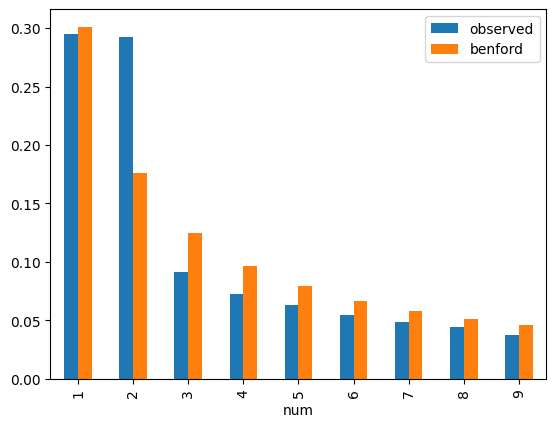

In [11]:
both_ppp = pd.merge(left=obs_ppp, right=bfd, on="num")
both_ppp.plot.bar(x="num")

## Chi Square Goodness of Fit Test

In [12]:
benford = bfd['benford'] * sum(ppp)
benford

test_stat, p = stats.chisquare(ppp, benford)
print("Test Statistic:", test_stat)
print("p-value:", p)

Test Statistic: 1154843.0289367815
p-value: 0.0


## Conclusion

It appears that PPP loans do not quite follow Benford's Law. Specifically, it appears that the leading digit 2 appears more often than it should.

There could be a number of explanations as to why. 
- For instance, it may be that regulations or rules regarding loan issuances tend to favor loans of a certain size beginning with the digit 2. 
- PPP loans were also legislated and issued within a short timeframe in order to respond quickly to the pandemic -- it therefore could also be that this led to an irregular pattern of loan amounts. 
- PPP loans have also been plagued with stories of [fraud](https://www.npr.org/2023/01/09/1145040599/ppp-loan-forgiveness) and [lack of oversight](https://www.wsj.com/articles/house-panel-criticizes-lack-of-oversight-on-ppp-loans-11598981252), which may also lead to systematic deviations. 

However, without further investigation, we cannot draw any such cause and effect conclusions.